### Goal: 
##### To build a text classification model to predict the artist from a piece of text

In [1]:
#To make this scrapper look legitimate, we spoof the headers we send along with our requests

import requests
from bs4 import BeautifulSoup
import pandas as pd

headers = {
    'Access-Control-Allow-Origin': '*',
    'Access-Control-Allow-Methods': 'GET',
    'Access-Control-Allow-Headers': 'Content-Type',
    'Access-Control-Max-Age': '3600',
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'
    }

1. Download HTML pages --> 2. Get a list of song urls --> 3. Extract lyrics from song urls

In [2]:
base_URL = "https://www.lyrics.com"

def get_lyrics(path):
    new_url = base_URL + path
    r = requests.get(new_url)
    soup = BeautifulSoup(r.content , 'html.parser')
    return soup.find('h1').text, soup.find('pre').text

In [3]:
url = base_URL + "/artist/Kirk-Franklin/77505"

r = requests.get(url)
soup = BeautifulSoup(r.content , 'html.parser')
tags = soup.find_all('strong')

song_links = []
# iterate over each song entry and grab the link to the lyrics
for content in tags:
    link = content.find('a')
    if link and link['href'].startswith('/lyric'):
        song_links.append(link['href'])

In [4]:
songs = {}
# then we iterate over all the lyric links and get the lyrics for each song
# those lyrics are then stored in songs[song_title]
for l in song_links:
    song,lyrics = get_lyrics(l)
    songs[song] = lyrics

In [5]:
songs

{'Ok': "Woke up to a world that is changing\nLooking out the window, got me wondering lately\nWill we be ok?\nWill we be ok? (Huh, yessuh)\nOne day I can feel the sun shining\nNext day a bullet can leave a momma cryin'\nWill she be ok? (Lord have mercy)\nTell me will we be ok?\n(Truth is)\n\nLife is taking everything that I have\nJust to survive (can I testify?)\n\nI got twenty-five dollars in my pocket\nAnd I think another ten in my glove compartment\nI'm trying so bad not to cry, but it's hard to stop it\nBut You say all of my needs You promised You got it\n\nSo I'm gon' be ok (hahaha yessuh)\nI'm gon' be ok (sing, ok, ok)\nSee I gotta remember, that my God is bigger\nThan any battle I'll ever face\nSo I'm gon' be ok\n\nYeah it's dark right now, huh\nBut I still see the light, come on\n\nWhy do we hate one another? (Yeah)\nWhen love is the most beautiful color\nIt takes away the grey (I hope somebody's listening)\nAnd makes everything ok (huh, my Lord)\nWhere is the American dream?\n

In [6]:
print (songs['Ok'])

Woke up to a world that is changing
Looking out the window, got me wondering lately
Will we be ok?
Will we be ok? (Huh, yessuh)
One day I can feel the sun shining
Next day a bullet can leave a momma cryin'
Will she be ok? (Lord have mercy)
Tell me will we be ok?
(Truth is)

Life is taking everything that I have
Just to survive (can I testify?)

I got twenty-five dollars in my pocket
And I think another ten in my glove compartment
I'm trying so bad not to cry, but it's hard to stop it
But You say all of my needs You promised You got it

So I'm gon' be ok (hahaha yessuh)
I'm gon' be ok (sing, ok, ok)
See I gotta remember, that my God is bigger
Than any battle I'll ever face
So I'm gon' be ok

Yeah it's dark right now, huh
But I still see the light, come on

Why do we hate one another? (Yeah)
When love is the most beautiful color
It takes away the grey (I hope somebody's listening)
And makes everything ok (huh, my Lord)
Where is the American dream?
If only one percent knows what it means


In [113]:
df = pd.DataFrame(list(songs.items()),columns = ['Title','Lyrics'])
df['Artist']='Kirk_Franklin'
df.head()

,Title,Lyrics,Artist
0,Ok,Woke up to a world that is changing\nLooking o...,Kirk_Franklin
1,Never Alone,In my time I've traveled some roads\nA rolling...,Kirk_Franklin
2,Bleed the Same,I wanna say something to everyone\r\nIn a spir...,Kirk_Franklin
3,Bleed the Same (Intro),I wanna say something to everyone\r\nIn a spir...,Kirk_Franklin
4,Unfinished,Not scared to say it\r\nI used to be the one\r...,Kirk_Franklin


**Pre-processing of data:** 

source: https://pythonhealthcare.org/2018/12/14/101-pre-processing-data-tokenization-stemming-and-removal-of-stop-words/

1. Tokenization (process of segmenting or separating text into words, clauses or sentences, & removal of punctuation) 
2. Stemming (reducing related words to a common stem)
3. Removal of Stop Words (removal of commonly used words unlikely to be useful for learning)

In [92]:
from sklearn.feature_extraction.text import CountVectorizer 
import nltk

In [114]:
#tokenization

def identify_tokens(row):
    Lyrics = row['Lyrics']
    #lyricss = df['Lyrics']
    tokens = nltk.word_tokenize(Lyrics)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

df['words'] = df.apply(identify_tokens, axis=1)
df.head(2)

,Title,Lyrics,Artist,words
0,Ok,Woke up to a world that is changing\nLooking o...,Kirk_Franklin,"[Woke, up, to, a, world, that, is, changing, L..."
1,Never Alone,In my time I've traveled some roads\nA rolling...,Kirk_Franklin,"[In, my, time, I, traveled, some, roads, A, ro..."


In [115]:
# stemming
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

def stem_list(row):
    my_list = row['words']
    stemmed_list = [stemming.stem(word) for word in my_list]
    return (stemmed_list)

df['stemmed_words'] = df.apply(stem_list, axis=1)
df.head()

,Title,Lyrics,Artist,words,stemmed_words
0,Ok,Woke up to a world that is changing\nLooking o...,Kirk_Franklin,"[Woke, up, to, a, world, that, is, changing, L...","[woke, up, to, a, world, that, is, chang, look..."
1,Never Alone,In my time I've traveled some roads\nA rolling...,Kirk_Franklin,"[In, my, time, I, traveled, some, roads, A, ro...","[In, my, time, I, travel, some, road, A, roll,..."
2,Bleed the Same,I wanna say something to everyone\r\nIn a spir...,Kirk_Franklin,"[I, wan, na, say, something, to, everyone, In,...","[I, wan, na, say, someth, to, everyon, In, a, ..."
3,Bleed the Same (Intro),I wanna say something to everyone\r\nIn a spir...,Kirk_Franklin,"[I, wan, na, say, something, to, everyone, In,...","[I, wan, na, say, someth, to, everyon, In, a, ..."
4,Unfinished,Not scared to say it\r\nI used to be the one\r...,Kirk_Franklin,"[Not, scared, to, say, it, I, used, to, be, th...","[not, scare, to, say, it, I, use, to, be, the,..."


In [116]:
# Removing stop words

from nltk.corpus import stopwords
stops = set(stopwords.words("english"))                  

def remove_stops(row):
    my_list = row['stemmed_words']
    meaningful_words = [w for w in my_list if not w in stops]
    return (meaningful_words)

df['stem_meaningful'] = df.apply(remove_stops, axis=1)
df.head()

,Title,Lyrics,Artist,words,stemmed_words,stem_meaningful
0,Ok,Woke up to a world that is changing\nLooking o...,Kirk_Franklin,"[Woke, up, to, a, world, that, is, changing, L...","[woke, up, to, a, world, that, is, chang, look...","[woke, world, chang, look, window, got, wonder..."
1,Never Alone,In my time I've traveled some roads\nA rolling...,Kirk_Franklin,"[In, my, time, I, traveled, some, roads, A, ro...","[In, my, time, I, travel, some, road, A, roll,...","[In, time, I, travel, road, A, roll, stone, no..."
2,Bleed the Same,I wanna say something to everyone\r\nIn a spir...,Kirk_Franklin,"[I, wan, na, say, something, to, everyone, In,...","[I, wan, na, say, someth, to, everyon, In, a, ...","[I, wan, na, say, someth, everyon, In, spirit,..."
3,Bleed the Same (Intro),I wanna say something to everyone\r\nIn a spir...,Kirk_Franklin,"[I, wan, na, say, something, to, everyone, In,...","[I, wan, na, say, someth, to, everyon, In, a, ...","[I, wan, na, say, someth, everyon, In, spirit,..."
4,Unfinished,Not scared to say it\r\nI used to be the one\r...,Kirk_Franklin,"[Not, scared, to, say, it, I, used, to, be, th...","[not, scare, to, say, it, I, use, to, be, the,...","[scare, say, I, use, one, preach, could, overc..."


In [117]:
df['lyrics'] = df['Lyrics'].str.replace('\W', ' ')
df['lyrics'] = df['lyrics'].str.lower()
df.head()

,Title,Lyrics,Artist,words,stemmed_words,stem_meaningful,lyrics
0,Ok,Woke up to a world that is changing\nLooking o...,Kirk_Franklin,"[Woke, up, to, a, world, that, is, changing, L...","[woke, up, to, a, world, that, is, chang, look...","[woke, world, chang, look, window, got, wonder...",woke up to a world that is changing looking ou...
1,Never Alone,In my time I've traveled some roads\nA rolling...,Kirk_Franklin,"[In, my, time, I, traveled, some, roads, A, ro...","[In, my, time, I, travel, some, road, A, roll,...","[In, time, I, travel, road, A, roll, stone, no...",in my time i ve traveled some roads a rolling ...
2,Bleed the Same,I wanna say something to everyone\r\nIn a spir...,Kirk_Franklin,"[I, wan, na, say, something, to, everyone, In,...","[I, wan, na, say, someth, to, everyon, In, a, ...","[I, wan, na, say, someth, everyon, In, spirit,...",i wanna say something to everyone in a spirit...
3,Bleed the Same (Intro),I wanna say something to everyone\r\nIn a spir...,Kirk_Franklin,"[I, wan, na, say, something, to, everyone, In,...","[I, wan, na, say, someth, to, everyon, In, a, ...","[I, wan, na, say, someth, everyon, In, spirit,...",i wanna say something to everyone in a spirit...
4,Unfinished,Not scared to say it\r\nI used to be the one\r...,Kirk_Franklin,"[Not, scared, to, say, it, I, used, to, be, th...","[not, scare, to, say, it, I, use, to, be, the,...","[scare, say, I, use, one, preach, could, overc...",not scared to say it i used to be the one pr...


In [118]:
# Save processed data
#cols_to_drop = ['Lyrics', 'words', 'stemmed_words']
df.drop(['Lyrics', 'words', 'stemmed_words'], axis=1, inplace=True)
df.head()

,Title,Artist,stem_meaningful,lyrics
0,Ok,Kirk_Franklin,"[woke, world, chang, look, window, got, wonder...",woke up to a world that is changing looking ou...
1,Never Alone,Kirk_Franklin,"[In, time, I, travel, road, A, roll, stone, no...",in my time i ve traveled some roads a rolling ...
2,Bleed the Same,Kirk_Franklin,"[I, wan, na, say, someth, everyon, In, spirit,...",i wanna say something to everyone in a spirit...
3,Bleed the Same (Intro),Kirk_Franklin,"[I, wan, na, say, someth, everyon, In, spirit,...",i wanna say something to everyone in a spirit...
4,Unfinished,Kirk_Franklin,"[scare, say, I, use, one, preach, could, overc...",not scared to say it i used to be the one pr...


In [119]:
df = df.set_axis(['Title', 'Artist', 'clean_lyrics', 'pre_clean'], axis=1, inplace=False)
df.to_csv('df_processed.csv', index=False)
df.head()

,Title,Artist,clean_lyrics,pre_clean
0,Ok,Kirk_Franklin,"[woke, world, chang, look, window, got, wonder...",woke up to a world that is changing looking ou...
1,Never Alone,Kirk_Franklin,"[In, time, I, travel, road, A, roll, stone, no...",in my time i ve traveled some roads a rolling ...
2,Bleed the Same,Kirk_Franklin,"[I, wan, na, say, someth, everyon, In, spirit,...",i wanna say something to everyone in a spirit...
3,Bleed the Same (Intro),Kirk_Franklin,"[I, wan, na, say, someth, everyon, In, spirit,...",i wanna say something to everyone in a spirit...
4,Unfinished,Kirk_Franklin,"[scare, say, I, use, one, preach, could, overc...",not scared to say it i used to be the one pr...


In [120]:
df.drop(['clean_lyrics'], axis=1, inplace=True)
df.to_csv('kirk.csv', index=False)

In [121]:
df.head()

,Title,Artist,pre_clean
0,Ok,Kirk_Franklin,woke up to a world that is changing looking ou...
1,Never Alone,Kirk_Franklin,in my time i ve traveled some roads a rolling ...
2,Bleed the Same,Kirk_Franklin,i wanna say something to everyone in a spirit...
3,Bleed the Same (Intro),Kirk_Franklin,i wanna say something to everyone in a spirit...
4,Unfinished,Kirk_Franklin,not scared to say it i used to be the one pr...


### WordCloud

In [99]:
import numpy as np
from matplotlib import pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

There are 260274 words in the combination of all review.


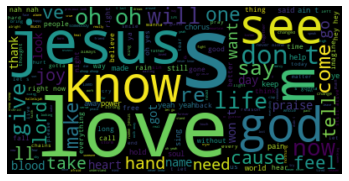

In [100]:
text = " ".join(review for review in df.pre_clean)
print ("There are {} words in the combination of all review.".format(len(text)))

# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["i", "m", "to", "a", "re", "me", "us", "ve", "s", "t", "ve", "re", "to", "is", "in"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)

# Display the generated image:
# the matplotlib way:

plt.imshow(wordcloud, interpolation='bilinear')#,width=width,height=height)
plt.axis("off")
plt.show()

wordcloud.to_file("../Image/kirkf.png")

**Create Corpus**

In [101]:
corpus = df["pre_clean"].tolist()
corpus

['woke up to a world that is changing looking out the window  got me wondering lately will we be ok  will we be ok   huh  yessuh  one day i can feel the sun shining next day a bullet can leave a momma cryin  will she be ok   lord have mercy  tell me will we be ok   truth is   life is taking everything that i have just to survive  can i testify    i got twenty five dollars in my pocket and i think another ten in my glove compartment i m trying so bad not to cry  but it s hard to stop it but you say all of my needs you promised you got it  so i m gon  be ok  hahaha yessuh  i m gon  be ok  sing  ok  ok  see i gotta remember  that my god is bigger than any battle i ll ever face so i m gon  be ok  yeah it s dark right now  huh but i still see the light  come on  why do we hate one another   yeah  when love is the most beautiful color it takes away the grey  i hope somebody s listening  and makes everything ok  huh  my lord  where is the american dream  if only one percent knows what it mean

4. Convert text to numbers by applying the Bag Of Words method

In [102]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
cv.fit(corpus)
out = cv.transform(corpus)

In [103]:
#Sparse Matrix

out.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [104]:
out

<158x2408 sparse matrix of type '<class 'numpy.int64'>'
	with 9881 stored elements in Compressed Sparse Row format>

In [111]:
X = df['pre_clean']
y = df['Artist']

In [105]:
X1 = pd.DataFrame(out.todense(), columns=cv.get_feature_names())
X1.head(2)

,106,11,16,17,1x,2000,22,2x,313,3x,...,yesterday,yo,yoke,yonder,young,younger,youre,zambia,zion,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
#Tf-Idf (Normalization)

from sklearn.feature_extraction.text import TfidfTransformer

tf = TfidfTransformer()
transformed = tf.fit_transform(out)

<158x2408 sparse matrix of type '<class 'numpy.float64'>'
	with 9881 stored elements in Compressed Sparse Row format>

In [109]:

tX_df = pd.DataFrame(transformed.todense(), columns=cv.get_feature_names())
tX_df.round(3)

,106,11,16,17,1x,2000,22,2x,313,3x,...,yesterday,yo,yoke,yonder,young,younger,youre,zambia,zion,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
tX_df.values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

5. Build and train a Naive Bayes classifier

## Classifier

In [88]:
df.head(2)

,106,11,16,17,1x,2000,22,2x,313,3x,...,yesterday,yo,yoke,yonder,young,younger,youre,zambia,zion,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### To do next:
1. Merge 2 or 3 artist csv files with X = lyrics & y = Artist_name
2. Create Model to predict which artist based on song lyrics
3. Try different models and optimize them